The price of the European call option using Black-Scholes formula is: 10.450583572185565
The simulated asset price is: 109.28907808268717


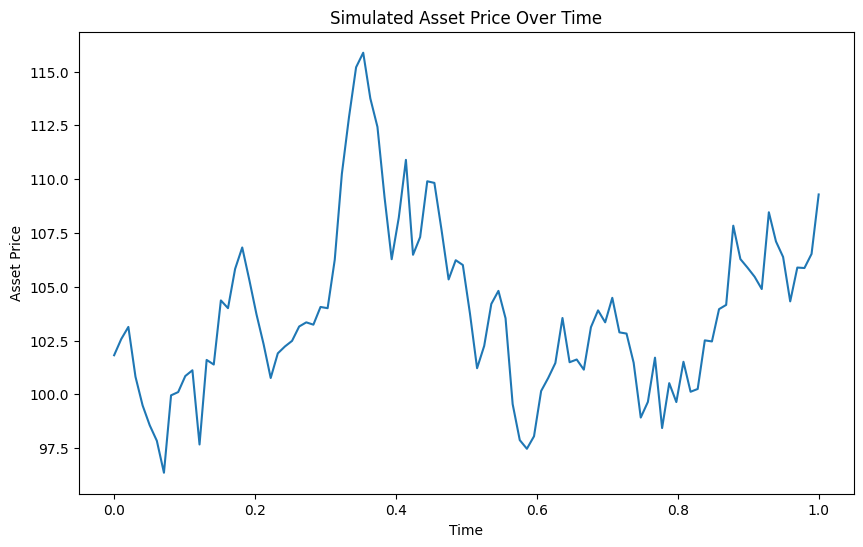

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function to simulate the asset price using Geometric Brownian Motion
def simulate_asset_price(S0, mu, sigma, T, dt):
    N = round(T/dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N)
    W = np.cumsum(W)*np.sqrt(dt) # standard brownian motion
    X = (mu-0.5*sigma**2)*t + sigma*W
    S = S0*np.exp(X) # geometric brownian motion
    return S, t

# Function to calculate the analytical price of a European call option using Black-Scholes formula
import numpy as np
from scipy.stats import norm

# Black-Scholes formula
def black_scholes_call(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    call_price = (S0 * norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * norm.cdf(d2, 0.0, 1.0))
    return call_price

# Parameters
S0 = 100      # initial asset price
K = 100       # strike price
T = 1.0       # time to maturity
r = 0.05      # risk-free rate
sigma = 0.2   # volatility

# Calculate call option price
call_price = black_scholes_call(S0, K, T, r, sigma)

print('The price of the European call option using Black-Scholes formula is:', call_price)


# Parameters
S0 = 100      # initial asset price
mu = 0.05     # drift
sigma = 0.2   # volatility
T = 1.0       # time to maturity
dt = 0.01     # time step
K = 100       # strike price
r = 0.05      # risk-free rate

# Simulate asset price
S, t = simulate_asset_price(S0, mu, sigma, T, dt)

print('The simulated asset price is:', S[-1])

# Plot the simulated asset price
plt.figure(figsize=(10,6))
plt.plot(t, S)
plt.title('Simulated Asset Price Over Time')
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.show()


The price at strike time for all scenarios is: [ 99.81397688 116.37108428  98.01244677 ...  98.48306276 131.76368506
 119.14294975]


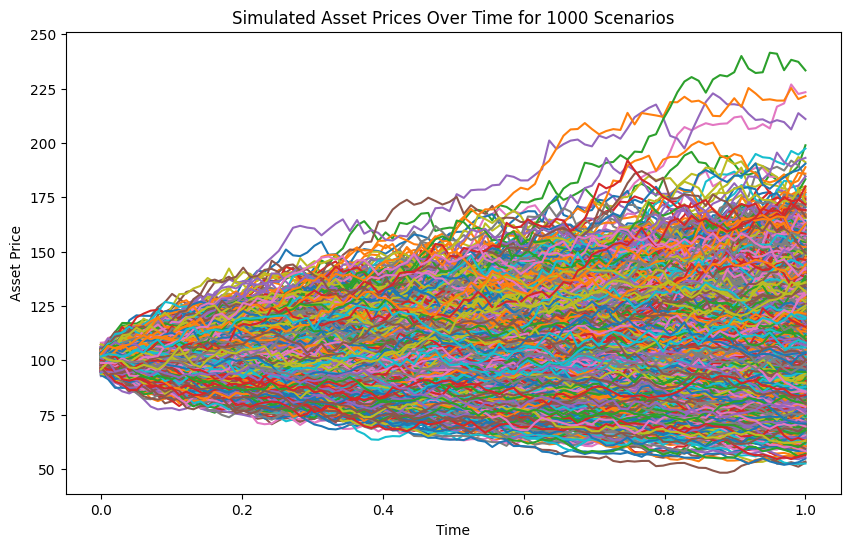

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function to simulate the asset price using Geometric Brownian Motion
def simulate_asset_price(S0, mu, sigma, T, dt, num_simulations):
    N = round(T/dt)
    t = np.linspace(0, T, N)
    S = np.zeros((num_simulations, N))
    S[:, 0] = S0
    for i in range(num_simulations):
        W = np.random.standard_normal(size = N)
        W = np.cumsum(W)*np.sqrt(dt) # standard brownian motion
        X = (mu-0.5*sigma**2)*t + sigma*W
        S[i] = S0*np.exp(X) # geometric brownian motion
    return S, S[:,-1], t  # Return the last column of S which represents the price at strike time

# Parameters
S0 = 100      # initial asset price
mu = 0.05     # drift
sigma = 0.2   # volatility
T = 1.0       # time to maturity
dt = 0.01     # time step
num_simulations = 5000 # number of simulations

# Simulate asset price
S, data, t = simulate_asset_price(S0, mu, sigma, T, dt, num_simulations)

# Print the price at strike time for all scenarios
print('The price at strike time for all scenarios is:', data)

# Plot the simulated asset prices
plt.figure(figsize=(10,6))
for i in range(num_simulations):
    plt.plot(t, S[i])
plt.title('Simulated Asset Prices Over Time for 1000 Scenarios')
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import time

In [ ]:
def create_model(m=64):  #Creating the uni-varaite function h_1 as DNN model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(m, input_shape=(1,), activation='relu',
                              kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                              bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)),
        tf.keras.layers.Dense(m, activation='relu',
                              kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                              bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)),
        tf.keras.layers.Dense(m, activation='relu',
                              kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1),
                              bias_initializer=tf.random_uniform_initializer(minval=-1, maxval=1)),
        tf.keras.layers.Dense(1,
                              kernel_initializer=tf.random_uniform_initializer(minval=-1, maxval=1))
    ])
    return model

In [ ]:
def h_model(m):
    model = create_model(m)
    return model

def integral_h(data,model):
    return tf.reduce_mean(model(data))


In [ ]:
def f(data,K):
  f_calculated=[]
  for d in data:
    f_calculated.append(tf.nn.relu(d-K))

  return f_calculated

In [ ]:
def integral_beta(gamma,f,model,data):
    return tf.reduce_mean((1/(2*gamma))*(tf.square(gamma*tf.nn.relu(f-model(data)))))


In [ ]:
def target_function(model,gamma,K,data):
    inth=integral_h(data,model)
    intbeta=integral_beta(gamma,f(data,K),model,data)
    return inth+intbeta


In [ ]:
gamma=100
size=1000
learning_rate=0.00001
beta1=0.99
beta2=0.995
epochs=10000
tol_h = 1e-5
m=16
num_experiments=1
K=100

In [ ]:
import tensorflow as tf
import numpy as np
import time
import random
import math

# Check if GPU is available and if so, set the device
if tf.config.experimental.list_physical_devices("GPU"):
    print("GPU available. Using GPU for calculations.")
    device = '/GPU:0'
else:
    print("GPU not available. Using CPU for calculations.")
    device = '/CPU:0'

GPU available. Using GPU for calculations.


In [ ]:
import matplotlib.pyplot as plt
import math as math
with tf.device(device):
  # Prepare a list to store the final w values

  # Start the experiments
  for i in range(num_experiments):
      print("Starting experiment", i + 1)


      # Reset the models and w for each experiment
      h = h_model(m)

      # Define the optimizers
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta1, beta_2=beta2)
      # Generate new data for each experiment

      # Prepare lists to store the loss values for plotting
      loss_values_h = []

      for epoch in range(epochs):
          with tf.GradientTape() as tape:
              loss =  target_function(h,gamma,K,data)

          grads = tape.gradient(loss, h.trainable_variables)
          optimizer.apply_gradients(zip(grads, h.trainable_variables))
          # Store the loss value for plotting
          loss_values_h.append(loss.numpy())

          # Print the loss value every 10 epochs
          if epoch % 100 == 0:
              print('Epoch:', epoch, 'Loss for h', loss.numpy())
              recorded_loss=loss.numpy()

      # Plot the loss values
      plt.figure(figsize=(12, 6))
      plt.plot(loss_values_h)
      plt.title('Loss ' + str(i+1))
      plt.show()
  # Compute and print the mean of the optimal w values
  print("Super-hedging value", loss.numpy())


Starting experiment 1
Epoch: 0 Loss for h 851028.9
Epoch: 100 Loss for h 769594.25
Epoch: 200 Loss for h 692834.7
Epoch: 300 Loss for h 621012.8
Epoch: 400 Loss for h 554118.75
Epoch: 500 Loss for h 491832.56
Epoch: 600 Loss for h 433976.1
Epoch: 700 Loss for h 380378.62
Epoch: 800 Loss for h 330887.94
Epoch: 900 Loss for h 285373.66
Epoch: 1000 Loss for h 243741.47
Epoch: 1100 Loss for h 205892.88
Epoch: 1200 Loss for h 171753.6
Epoch: 1300 Loss for h 141250.39
Epoch: 1400 Loss for h 114313.54
Epoch: 1500 Loss for h 90866.984
Epoch: 1600 Loss for h 70826.07
Epoch: 1700 Loss for h 54091.855
Epoch: 1800 Loss for h 40543.848
Epoch: 1900 Loss for h 30029.021
Epoch: 2000 Loss for h 22344.715
Epoch: 2100 Loss for h 17170.566
Epoch: 2200 Loss for h 13489.464
Epoch: 2300 Loss for h 10672.547
Epoch: 2400 Loss for h 8467.578
Epoch: 2500 Loss for h 6726.745
Epoch: 2600 Loss for h 5351.6006
Epoch: 2700 Loss for h 4267.769
Epoch: 2800 Loss for h 3416.1604
Epoch: 2900 Loss for h 2750.262
Epoch: 300